In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


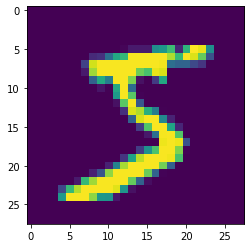

5


In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [5]:
x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
# x_train.shape and x_test.shape being 784 represent the number of units in the input layer
# x_train.shape and y_test.shape being 10 represent output layer units for classification
'''There can be N number of hidden layers and any number of units in each of those hidden layers.
** Sequential_api can be used here in-order to compute simple models as such.
** There is also another api called functional_api which can handle more complex models where layers
are not stacked sequentially instead there is some different arranged in kinda of a graph.'''

## Sequential_API 

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,))) # relu - rectified layer unit
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # we would have used activation='sigmoid' for binary clsfctn
                                           # instead here we are using 'softmax' which is eff for multiclass

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10, batch_size=1024)

Epoch 1/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0195 - accuracy: 0.9948
Epoch 2/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0145 - accuracy: 0.9965
Epoch 3/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0119 - accuracy: 0.9970
Epoch 4/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0095 - accuracy: 0.9980
Epoch 5/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0074 - accuracy: 0.9987
Epoch 6/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0064 - accuracy: 0.9988
Epoch 7/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0057 - accuracy: 0.9988
Epoch 8/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0039 - accuracy: 0.9995
Epoch 9/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0030 - accuracy: 0.9996
Epoch 10/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0023 - accuracy: 0.9997


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0763 - accuracy: 0.9804


[0.07630211859941483, 0.980400025844574]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


## Functional_API

In [16]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [17]:
input_ = Input(shape = [784,])
hidden_1 = Dense(256, activation='relu')(input_)  # these two make up one side of the graph
hidden_2 = Dense(256, activation='relu')(hidden_1) # i.e hidden_1 and hidden_2
hidden_3 = Dense(256, activation='relu')(input_)  # forms another path in the graph for neural network flow

In [18]:
concat_layer = Concatenate()([hidden_2, hidden_3])
output = Dense(10, activation='softmax')(concat_layer)
model = Model(inputs = [input_], outputs= [output])

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          65792       ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 5s 16ms/step - loss: 0.3939 - accuracy: 0.8902
Epoch 2/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1486 - accuracy: 0.9573
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0991 - accuracy: 0.9712
Epoch 4/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0716 - accuracy: 0.9789
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0535 - accuracy: 0.9840
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0416 - accuracy: 0.9877
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0306 - accuracy: 0.9916
Epoch 8/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0266 - accuracy: 0.9925
Epoch 9/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0190 - accuracy: 0.9951
Epoch 10/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0146 - accura

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0651 - accuracy: 0.9801


[0.06509219855070114, 0.9800999760627747]